In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
result_v2 = pd.read_csv('../data/processed/cleaned_data.csv')

In [3]:
result_v2.columns

Index(['raceId', 'season', 'raceNumber', 'prixName', 'raceDate', 'driverId',
       'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorRacePoints', 'driverNumber',
       'driverDateOfBirth', 'driverNationality', 'constructorName',
       'constructorNationality', 'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry',
       'driverRaceResultStatus', 'driverName', 'driverAge', 'driverDnf',
       'constructorDnf'],
      dtype='object')

In [4]:
result_v2.head(3)

,raceId,season,raceNumber,prixName,raceDate,driverId,constructorId,driverStartGridPos,driverFinalGridPos,driverFinalRank,driverRacePoints,driverLapCount,driverFatestLapNumber,driverFastestLapTime,driverFastestLapSpeed,constructorRacePoints,driverNumber,driverDateOfBirth,driverNationality,constructorName,constructorNationality,constructorChampionshipStandingPoints,constructorChampionshipStandingPosition,constructorChampionshipStandingWins,driverChampionshipStandingPoints,driverChampionshipStandingPosition,driverChampionshipStandingWins,circuitName,circuitLocation,circuitCountry,driverRaceResultStatus,driverName,driverAge,driverDnf,constructorDnf
0,1,2009,1,Australian Grand Prix,2009-03-29,18,23,1,1.0,1,10.0,58.0,17.0,1:28.020,216.891,18.0,22.0,1980-01-19,British,Mercedes,British,18.0,1.0,1.0,10.0,1.0,1.0,Albert Park Grand Prix Circuit,Melbourne,Australia,Finished,Jenson Button,43.0,0,1
1,1,2009,1,Australian Grand Prix,2009-03-29,22,23,2,2.0,2,8.0,58.0,43.0,1:29.066,214.344,18.0,0.0,1972-05-23,Brazilian,Mercedes,British,18.0,1.0,1.0,8.0,2.0,0.0,Albert Park Grand Prix Circuit,Melbourne,Australia,Finished,Rubens Barrichello,51.0,0,1
2,1,2009,1,Australian Grand Prix,2009-03-29,15,7,20,3.0,3,6.0,58.0,50.0,1:28.916,214.706,11.0,0.0,1974-07-13,Italian,Toyota,Japanese,11.0,2.0,0.0,6.0,3.0,0.0,Albert Park Grand Prix Circuit,Melbourne,Australia,Finished,Jarno Trulli,49.0,0,1


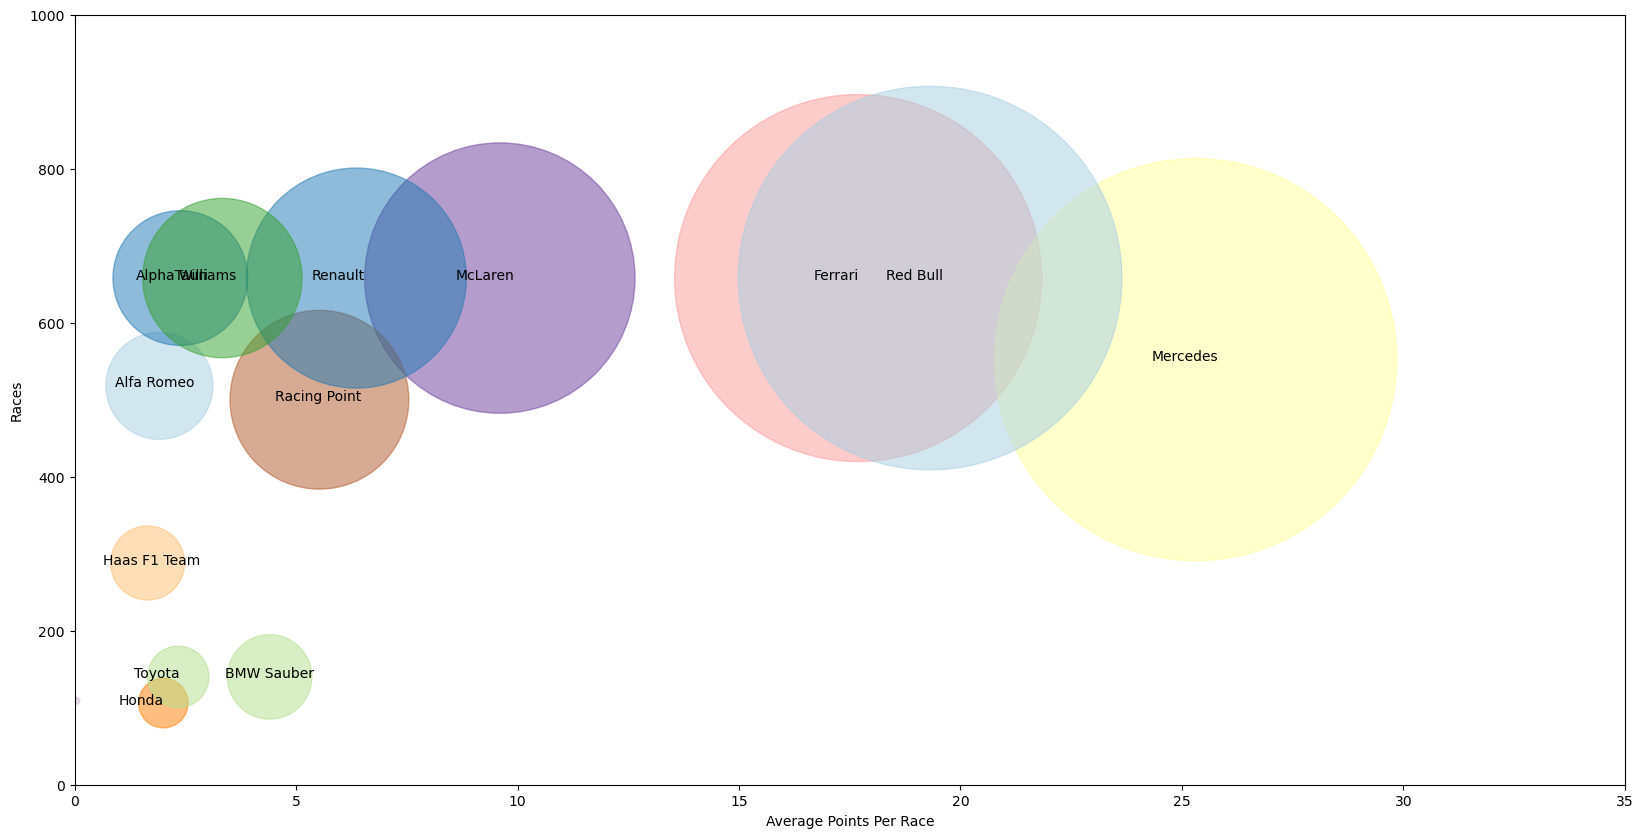

In [5]:
result_v2 = result_v2[result_v2.season > 2000]

# Aggregate total points and average points per race
avg_pts = result_v2[['constructorName','constructorRacePoints']].groupby("constructorName").mean()
total_pts = result_v2[['constructorName','constructorRacePoints']].groupby("constructorName").sum()
n = result_v2[['constructorName','raceId']].groupby("constructorName").count()
num_races = n[n.raceId > 100]
d = pd.merge(avg_pts, total_pts, on='constructorName')
md = pd.merge(d, num_races, on='constructorName')
md = md.reset_index()

plt.figure(figsize=(20, 10))
plt.scatter(md.constructorRacePoints_x, md.raceId, s=md.constructorRacePoints_y*6, alpha=0.5, color=sns.color_palette("Paired", len(md)))
plt.xlim(0, 35)
plt.ylim(0, 1000)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x, y, z in zip(md.constructorRacePoints_x, md.raceId, md.constructorName):
  plt.annotate(z, xy=(x-1,y-1)) 

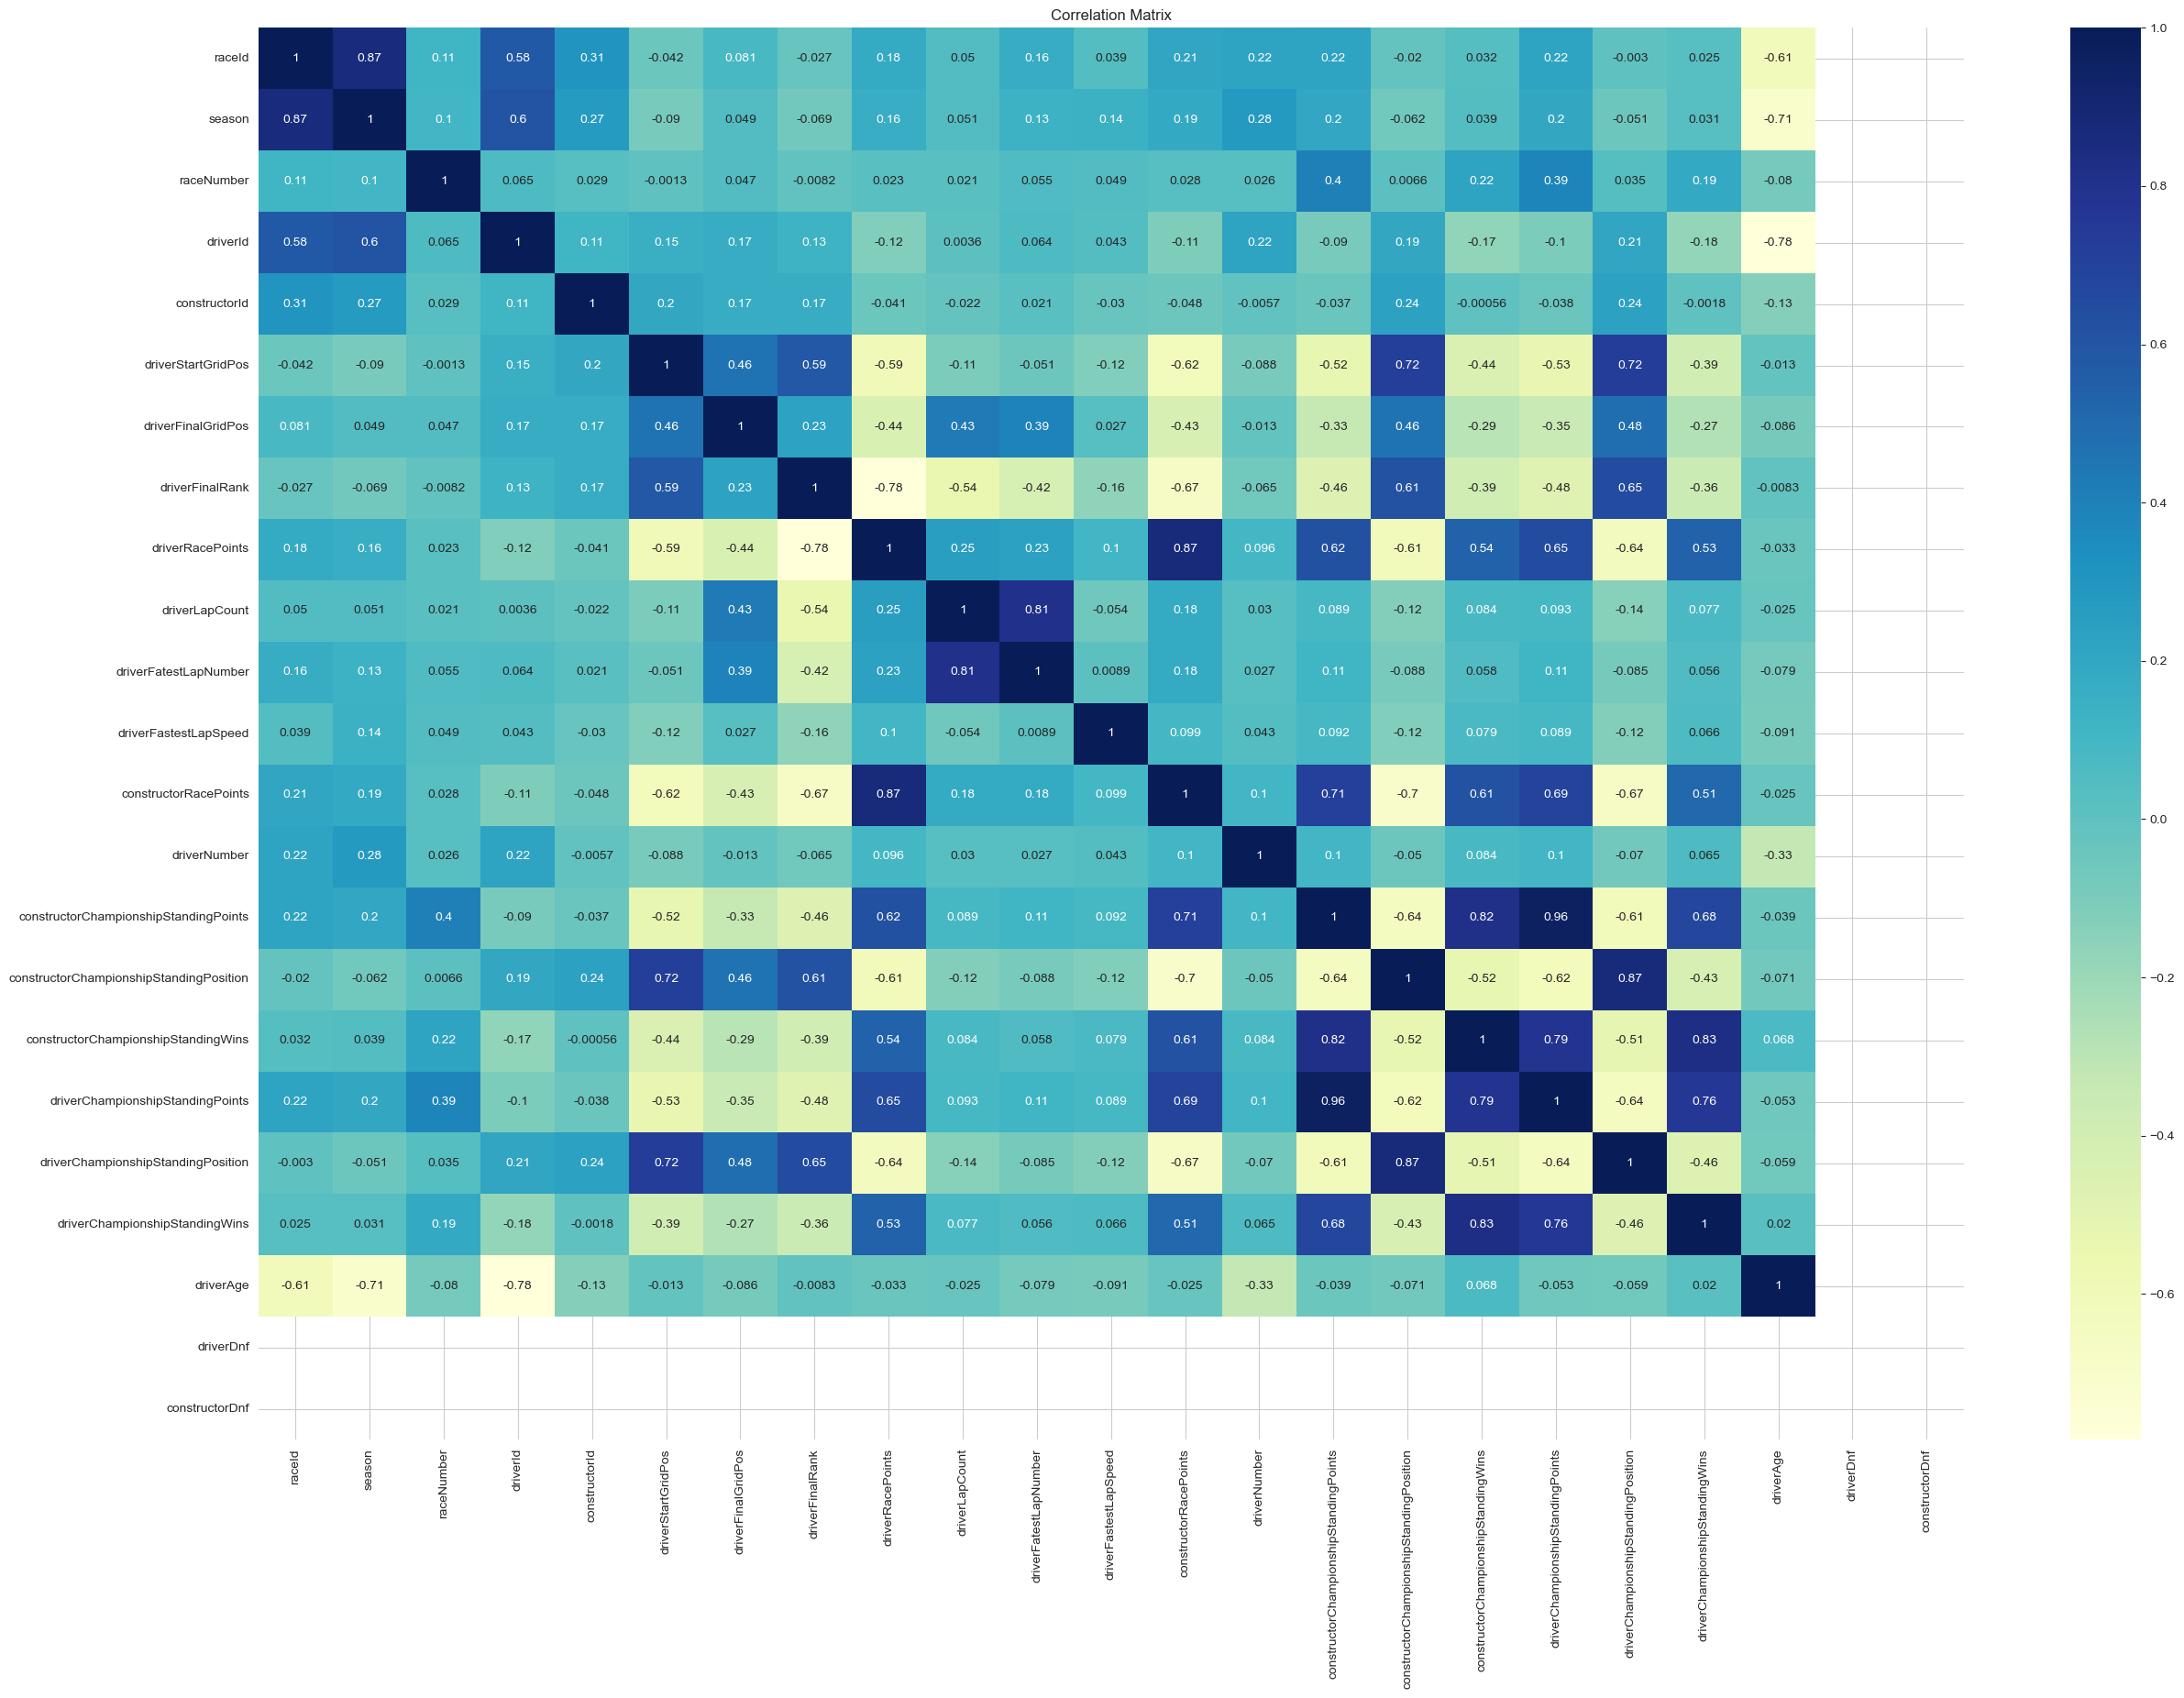

In [51]:
# Visualize the correlation matrix using a heatmap
corr = result_v2.corr()

fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches
sns.heatmap(corr, annot=True, ax=ax, cmap="YlGnBu")

plt.title('Correlation Matrix')
plt.show()

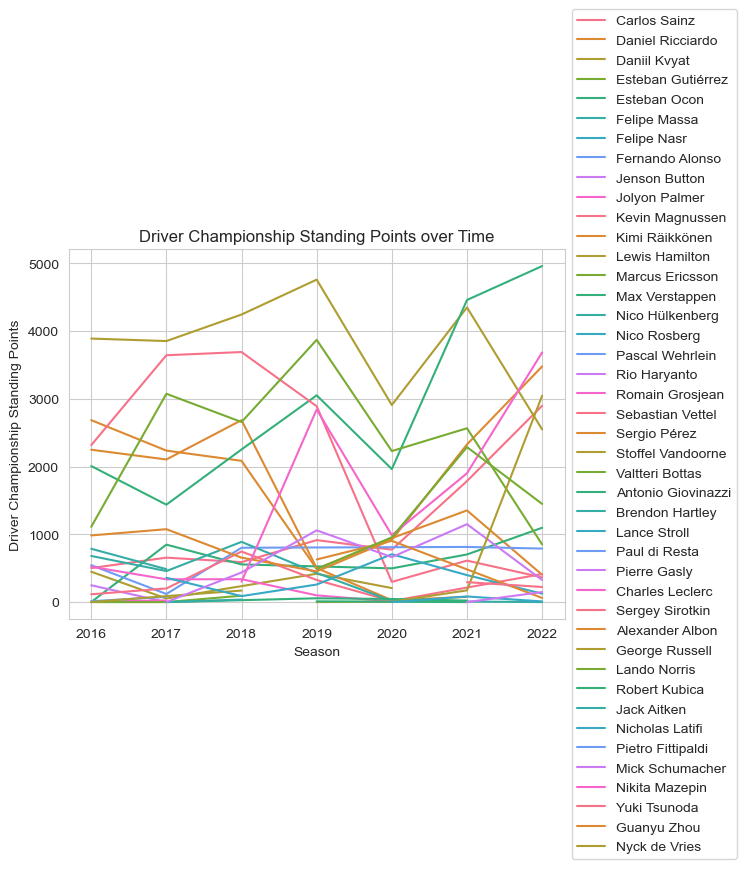

In [24]:
#Select driver championship standing points for seasons after 2015
driver_points = result_v2[result_v2.season > 2015]

#Group by season and driver name and sum the driver championship standing points
driver_points = driver_points.groupby(['season', 'driverName'])['driverChampionshipStandingPoints'].sum().reset_index()

fig, ax = plt.subplots()

#Iterate through each unique driver name in the driver_points dataframe
for driver in driver_points['driverName'].unique():
    driver_df = driver_points[driver_points['driverName'] == driver]
    ax.plot(driver_df['season'], driver_df['driverChampionshipStandingPoints'], label=driver)

#Set the plot title, x-axis label, and y-axis label
ax.set_title('Driver Championship Standing Points over Time')
ax.set_xlabel('Season')
ax.set_ylabel('Driver Championship Standing Points')
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


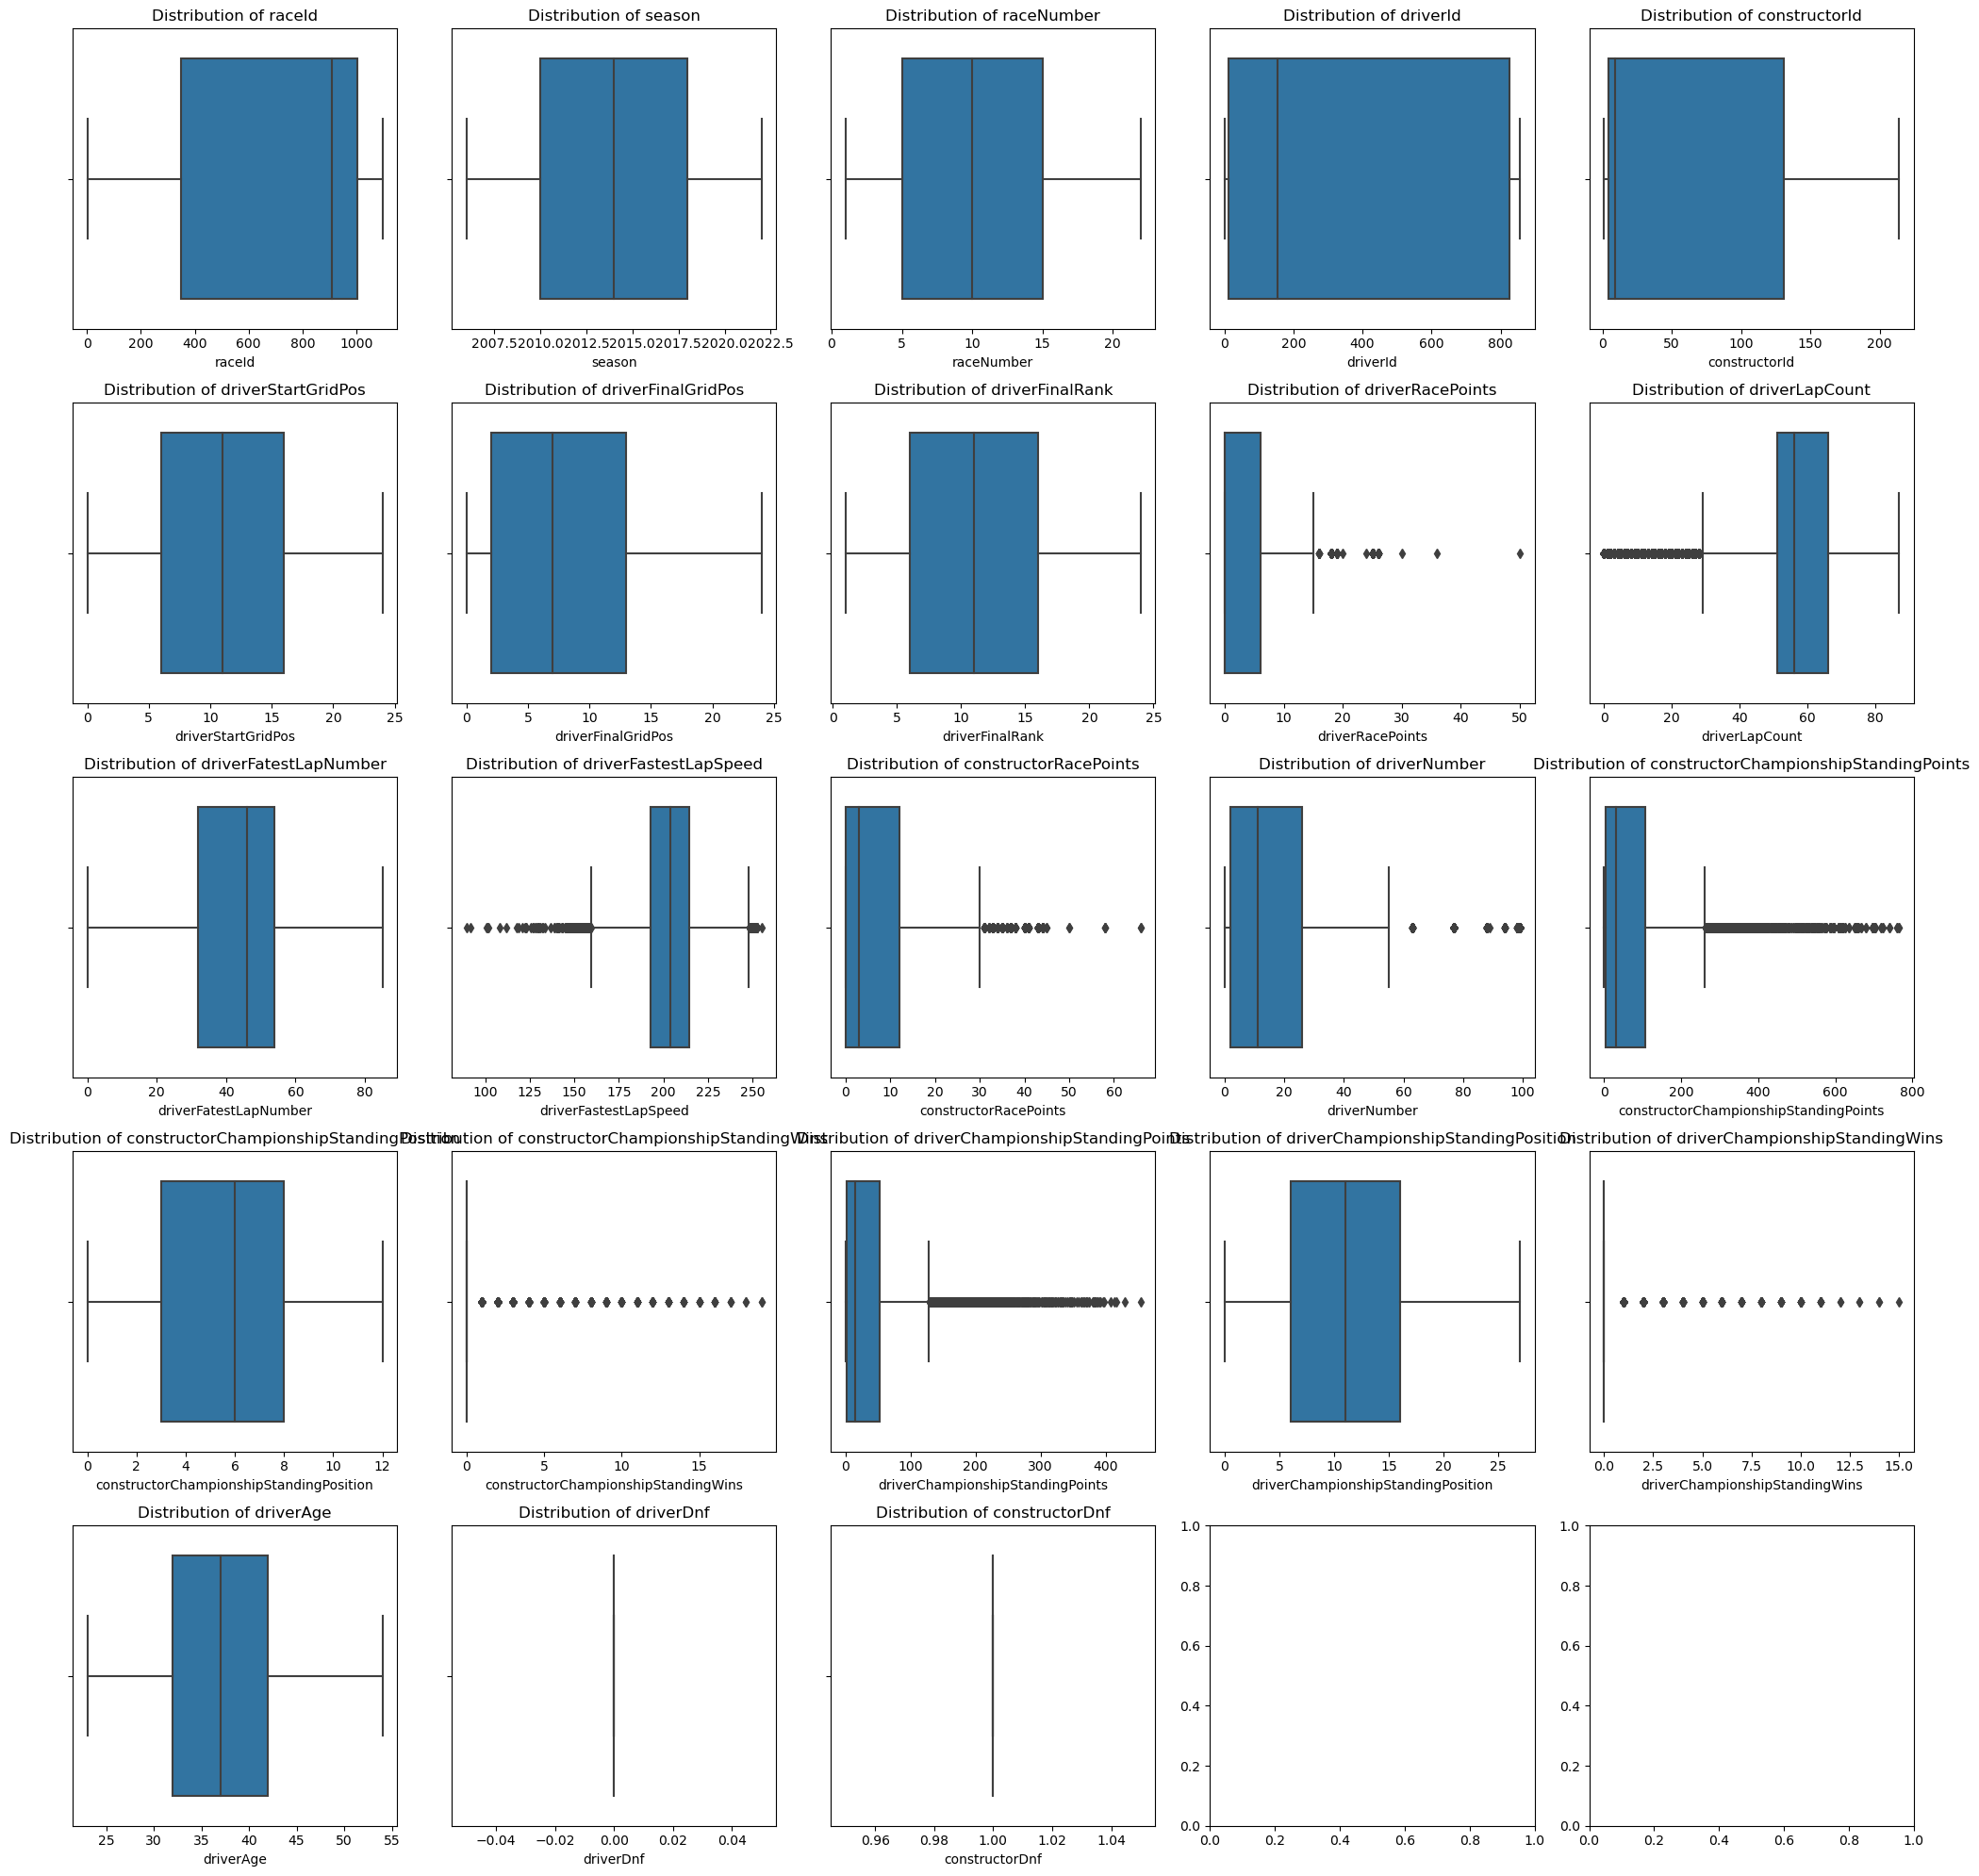

In [8]:
df = result_v2

num_df = df.select_dtypes(include=['int64', 'float64'])

# Creating a box plot of driver race points
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Looping through each numerical column and create a box plot in the corresponding subplot
for i, column in enumerate(num_df.columns):
    row = i // 5
    col = i % 5
    ax = axes[row][col]
    sns.boxplot(x=num_df[column], ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Adjust layout and show plot
fig.tight_layout()
plt.show()


Numerical data distribution


In [10]:
#Performing numerical data distribution analysis
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [11]:
df_num = df.select_dtypes(include = ['float64', 'int64', 'int32'])
df_num.head()

,raceId,season,raceNumber,driverId,constructorId,driverStartGridPos,driverFinalGridPos,driverFinalRank,driverRacePoints,driverLapCount,driverFatestLapNumber,driverFastestLapSpeed,constructorRacePoints,driverNumber,constructorChampionshipStandingPoints,constructorChampionshipStandingPosition,constructorChampionshipStandingWins,driverChampionshipStandingPoints,driverChampionshipStandingPosition,driverChampionshipStandingWins,driverAge,driverDnf,constructorDnf
0,1,2009,1,18,23,1,1.0,1,10.0,58.0,17.0,216.891,18.0,22.0,18.0,1.0,1.0,10.0,1.0,1.0,43.0,0,1
1,1,2009,1,22,23,2,2.0,2,8.0,58.0,43.0,214.344,18.0,0.0,18.0,1.0,1.0,8.0,2.0,0.0,51.0,0,1
2,1,2009,1,15,7,20,3.0,3,6.0,58.0,50.0,214.706,11.0,0.0,11.0,2.0,0.0,6.0,3.0,0.0,49.0,0,1
3,1,2009,1,10,7,19,4.0,4,5.0,58.0,53.0,215.920,11.0,0.0,11.0,2.0,0.0,5.0,4.0,0.0,41.0,0,1
4,1,2009,1,4,4,10,5.0,5,4.0,58.0,53.0,215.199,4.0,14.0,4.0,3.0,0.0,4.0,5.0,0.0,42.0,0,1


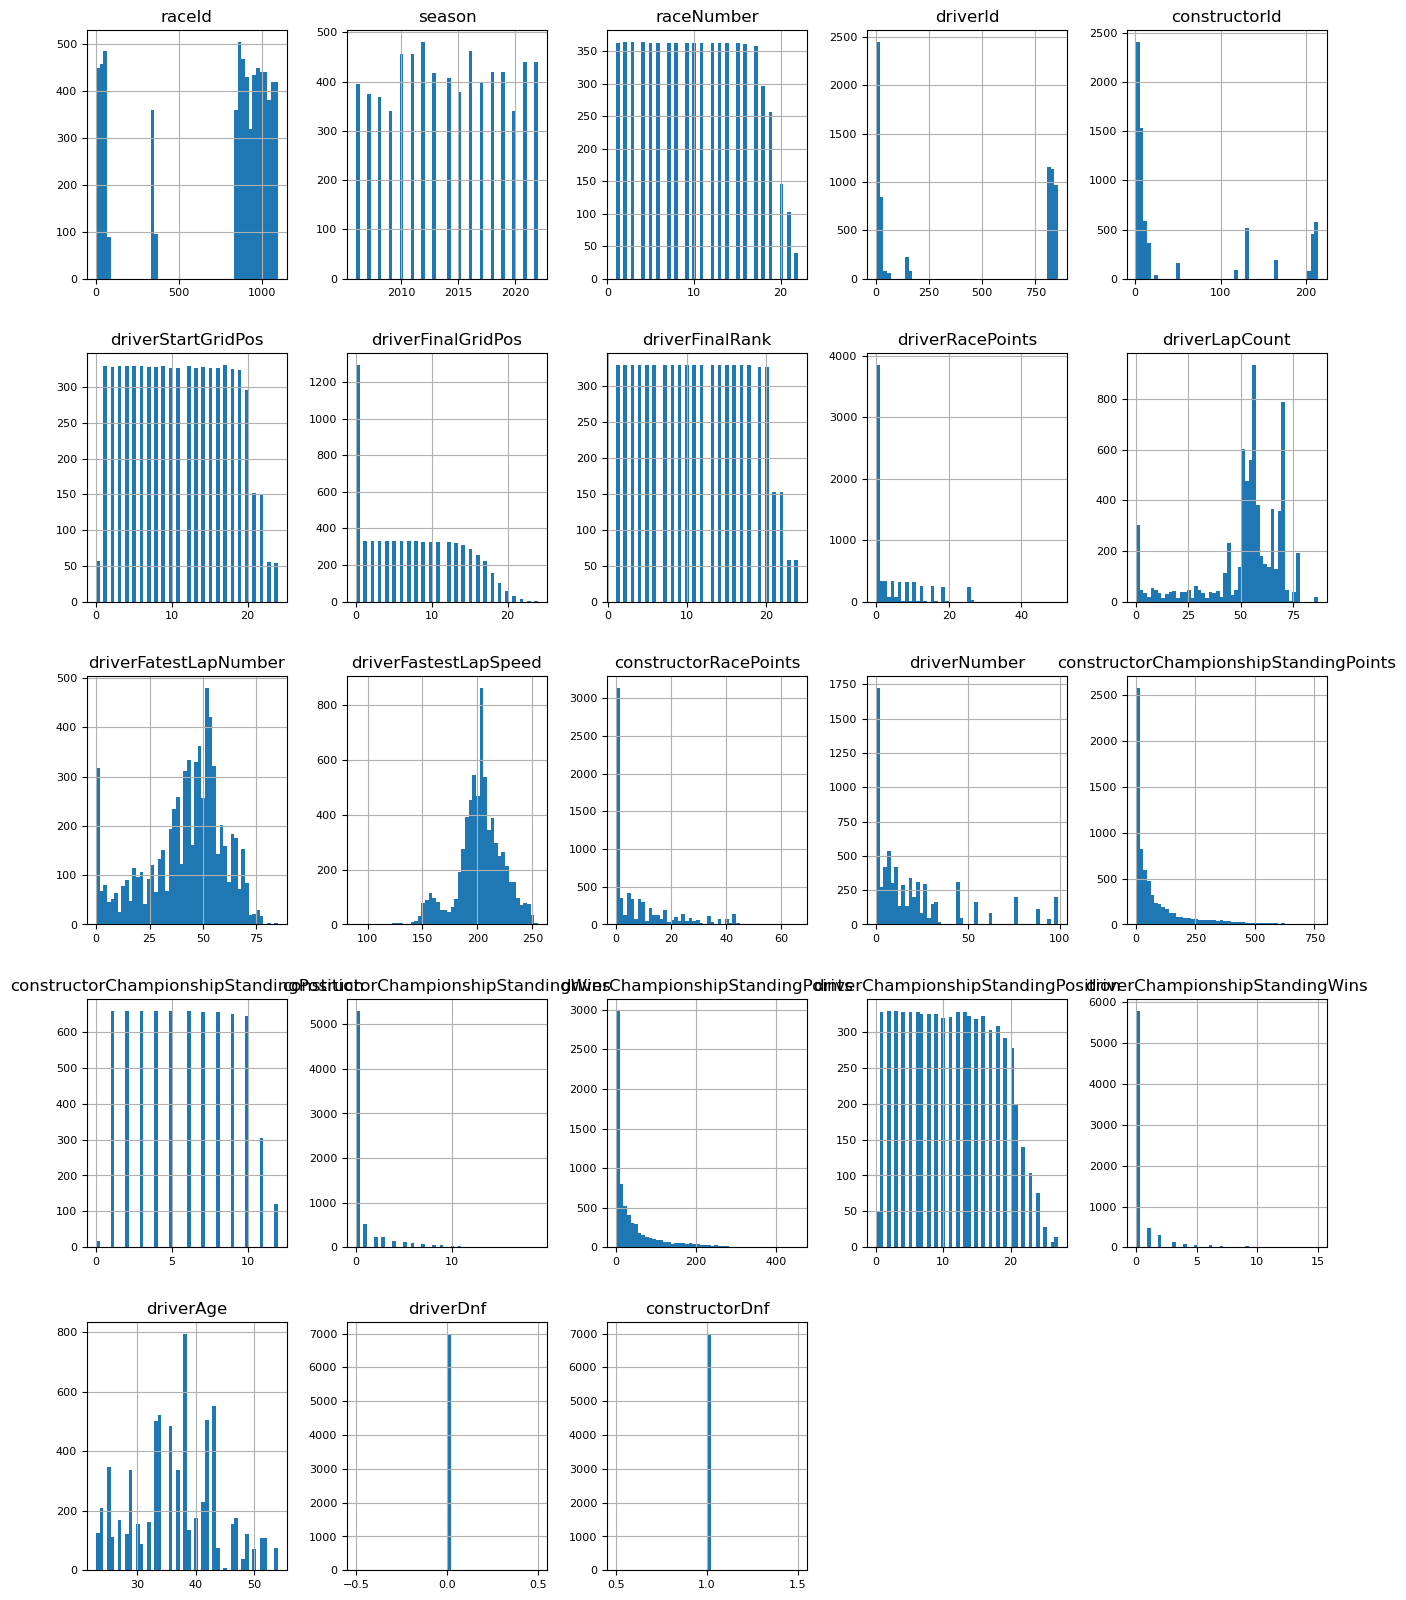

In [12]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


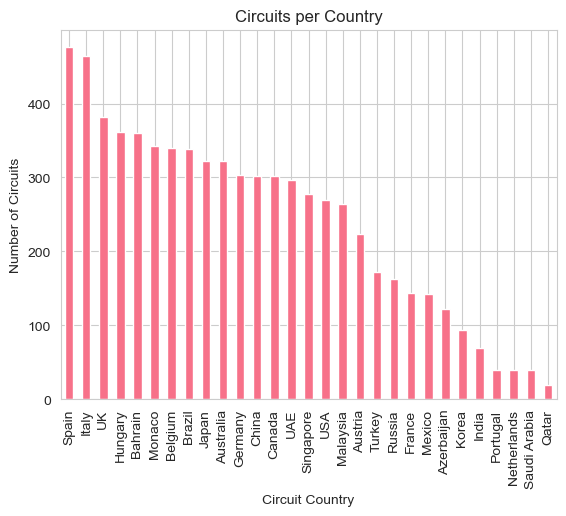

In [45]:
# Create a bar chart of circuitCountry
df['circuitCountry'].value_counts().plot(kind='bar')

# Set x and y-axis labels
plt.xlabel('Circuit Country')
plt.ylabel('Number of Circuits')
# Set the title of the plot
plt.title('Circuits per Country')

# Show the plot
plt.show()


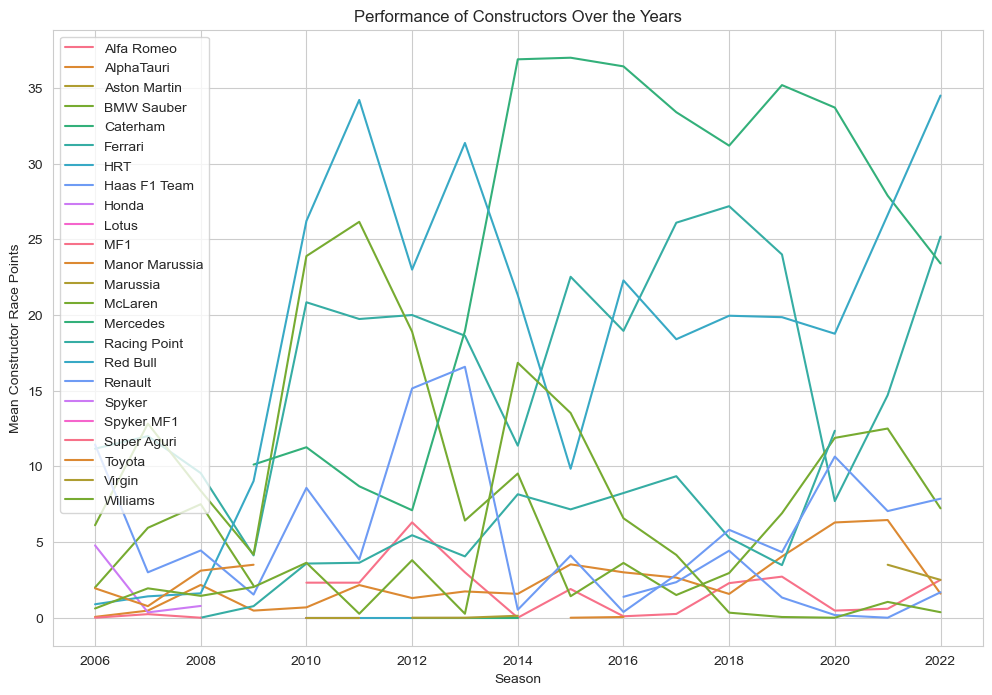

In [17]:
df = result_v2

constructor_performance = df.groupby(['constructorName', 'season'])['constructorRacePoints'].mean().reset_index()

# Loop through each constructor and plot a line chart of their performance over the years
plt.figure(figsize=(12,8))
for constructor in constructor_performance['constructorName'].unique():
    constructor_data = constructor_performance[constructor_performance['constructorName']==constructor]
    plt.plot(constructor_data['season'], constructor_data['constructorRacePoints'], label=constructor)

# Set the title and labels of the plot
plt.title('Performance of Constructors Over the Years')
plt.xlabel('Season')
plt.ylabel('Mean Constructor Race Points')

# Display the legend
plt.legend(loc='best')

# Show the plot
plt.show()


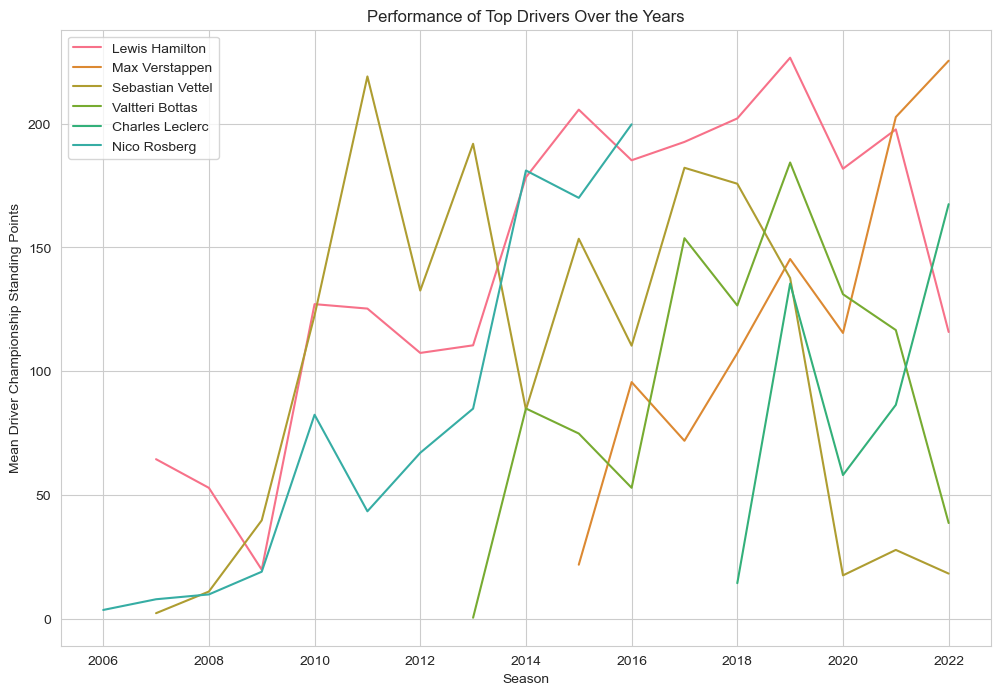

In [18]:
# Load the F1 dataset into a pandas dataframe
df = result_v2

# Group the data by driverName and season and compute the mean driverChampionshipStandingPoints
driver_performance = df.groupby(['driverName', 'season'])['driverChampionshipStandingPoints'].mean().reset_index()

# Get the top 5 drivers by mean driverChampionshipStandingPoints across all seasons
top_drivers = driver_performance.groupby('driverName')['driverChampionshipStandingPoints'].mean().sort_values(ascending=False)[:6].index

# Loop through each top driver and plot a line chart of their performance over the years
plt.figure(figsize=(12,8))
for driver in top_drivers:
    driver_data = driver_performance[driver_performance['driverName']==driver]
    plt.plot(driver_data['season'], driver_data['driverChampionshipStandingPoints'], label=driver)

# Set the title and labels of the plot
plt.title('Performance of Top Drivers Over the Years')
plt.xlabel('Season')
plt.ylabel('Mean Driver Championship Standing Points')

# Display the legend
plt.legend(loc='best')

# Show the plot
plt.show()


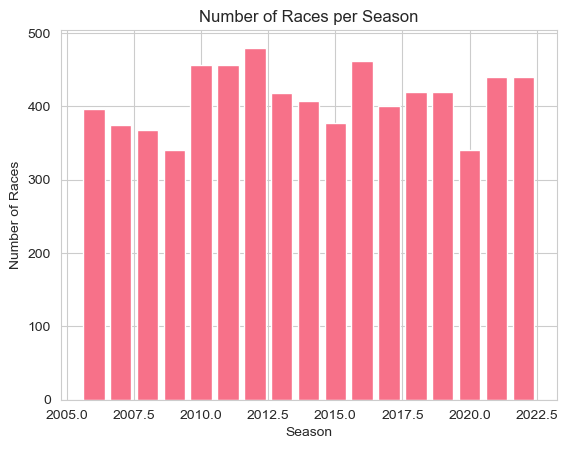

In [59]:
df = result_v2
#Get the count of races by season and sort them by season
season_counts = df['season'].value_counts().sort_index()
#Create a bar plot of the number of races per season
plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.title('Number of Races per Season')
plt.show()


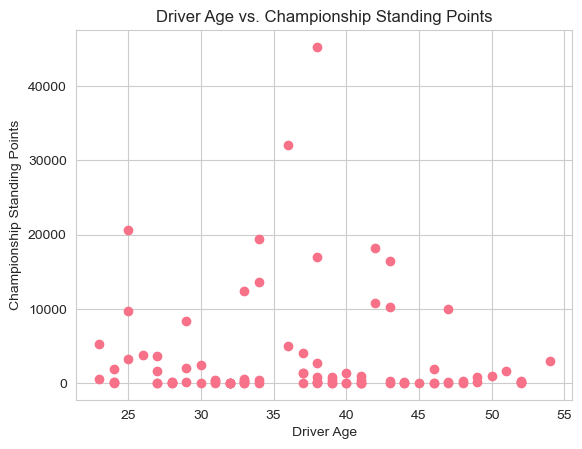

In [60]:
#Grouping the data by driverId and taking the maximum driver age and sum of driver championship standing points
driver_age = df.groupby('driverId')['driverAge'].max()
driver_points = df.groupby('driverId')['driverChampionshipStandingPoints'].sum()
#Creating a scatter plot with driver age on x-axis and championship standing points on y-axis
plt.scatter(driver_age, driver_points)
plt.xlabel('Driver Age')
plt.ylabel('Championship Standing Points')
plt.title('Driver Age vs. Championship Standing Points')
plt.show()


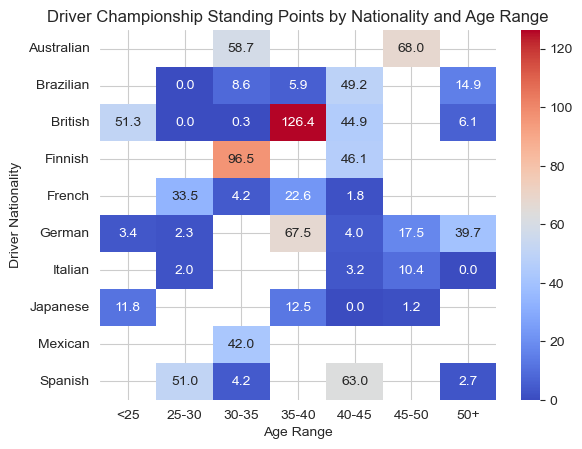

In [62]:
#Creating bins and labels for age ranges
age_bins = [0, 25, 30, 35, 40, 45, 50, np.inf]
#Creating a new column 'age_range' based on the driver's age and the age bins
age_labels = ['<25', '25-30', '30-35', '35-40', '40-45', '45-50', '50+']
df['age_range'] = pd.cut(df['driverAge'], bins=age_bins, labels=age_labels)
driver_nationalities = df['driverNationality'].value_counts()[:10].index
#Create a pivot table to calculate mean driver championship standing points by nationality and age range
driver_championships = pd.pivot_table(df[df['driverNationality'].isin(driver_nationalities)], index='driverNationality', columns='age_range', values='driverChampionshipStandingPoints', aggfunc='mean')
sns.heatmap(driver_championships, cmap='coolwarm', annot=True, fmt='.1f')
plt.xlabel('Age Range')
plt.ylabel('Driver Nationality')
plt.title('Driver Championship Standing Points by Nationality and Age Range')
plt.show()
